In [1]:
import tensorflow as tf
import tensorflow.keras as k
import helper_functions as h
import numpy as np

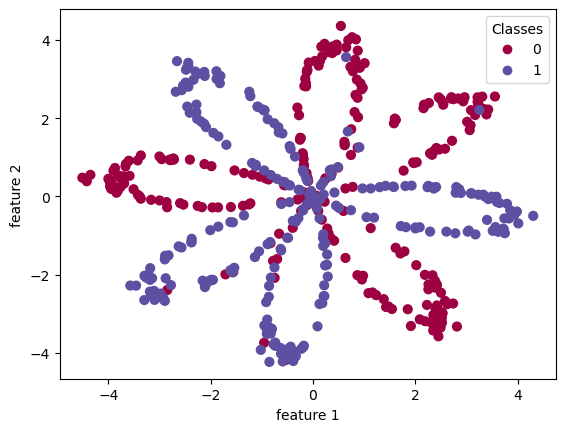

In [2]:
X_np, Y_np = h.load_flower_dataset(num_samples=500, petals=4, angle=30)
h.plot_scatter(X_np, Y_np)

In [3]:
X = tf.convert_to_tensor(X_np.T, dtype=tf.float32)    # (m,d)=(500,2)
Y = tf.convert_to_tensor(Y_np.T, dtype=tf.float32)    # (m,1)=(500,1)

# Theory Hidden Layer Neural Network

**Data used**:
       
<table style="width:50%">
  <tr>
    <td>m (# of samples)</td>
    <td> 500 </td> 
  </tr>
  <tr>
    <td>d (# of features)</td>
    <td> 2 </td> 
  </tr>
  <tr>
    <td> shape of X </td>
    <td> (m,d)=(500, 2) </td> 
  </tr>
  <tr>
    <td>shape of Y </td>
    <td>(m,1)=(500, 1) </td> 
  </tr>
  
</table>

## Now
$ \boldsymbol{X} = \begin{bmatrix} \quad \boldsymbol x^1 \quad 
\\ \quad \boldsymbol{x}^2 \quad \\ \quad \vdots \quad \\ \quad \boldsymbol x^m \quad \end{bmatrix} $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 & f_2 & f_3 & \dots \quad f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(m,d)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,d)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 \\ y^2 \\ \vdots \\ y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(m,1)}$ 

$$ 
\boldsymbol{W^{[l]}} = 
\begin{bmatrix} \bold {w_1} & \bold {w_2}  & \dots & \bold {w_{n_l}} \end{bmatrix} =
\begin{bmatrix} \vdots \\ \boldsymbol{\omega_1} & \boldsymbol{\omega_2} & \dots & \boldsymbol{\omega_{n_l}} \\ \vdots \end{bmatrix}
,\qquad \boldsymbol{b^{[l]}} = \begin{bmatrix} b_1 \\ b_2 \\ b_3  \\ \vdots  \\ b_{n_l} \end{bmatrix}
$$
$$ \boldsymbol{\omega_{n}} = \begin{bmatrix} w_1 \\ w_2 \\ w_3  \\ \vdots  \\ w_{n_{l-1}} \end{bmatrix}$$
So
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1}, 1)}$
$,\qquad \qquad \bold w \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1},1)}$
<br>
$ \boldsymbol{W^{l}} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1},n_l)}$
$ ,\qquad \enspace \boldsymbol{b} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l,)}$

build-in dense($A^{[l-1]}$)
<br>
$ \boldsymbol{Z^{[l]}/dense} = \boldsymbol{A^{[l-1]} W^{[l]}+b}
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(m,n_l)=(m,n_{l-1})\times(n_{l-1},n_l)} $
<br>
$ \boldsymbol Z^{[l]} = \begin{bmatrix} z^1 \\ z^2 & \boldsymbol{z^{[l]}_{2}} & \boldsymbol{z^{[l]}_{3}} & \dots & \boldsymbol{z^{[l]}_{n_l}} \\ \vdots \\ z^m \end{bmatrix} $

**Data**
<br>
$
\boldsymbol {X^{[0]}} = \boldsymbol {A^{[0]}} \qquad \qquad \
\color{purple}{shape: \qquad}\color{blue}{(m,n_x)=(m,d)} \color{default}
\\
\boldsymbol {Y}, \ \boldsymbol {\hat{Y}=A^{[2]}} \qquad \quad \ \
\color{purple}{shape: \qquad}\color{blue}{(m,n_y)=(m,1)} \color{default}
\\
\boldsymbol {W^{[1]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_x,n_h)=(d,n_h)} \color{default}
\\
\boldsymbol {W^{[2]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_h,n_y)=(n_h,1)} \color{default}
\\
\boldsymbol {b^{[1]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_h,)} \color{default}
\\
\boldsymbol {b^{[2]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_y,)} \color{default}
$

**Epoch**
<br>
$ \begin{rcases}
% \boldsymbol {Z^{[1]}} = \boldsymbol{W^{[1]}X} + \boldsymbol{b^{[1]}} 
% \qquad \qquad \qquad
% \color{purple}{shape: \qquad}\color{blue}{(n_h,m)=(n_h,d)\times(d,m)} \\
% or\\
\boldsymbol {Z^{[1]}} = \boldsymbol{A^{[0]}W^{[1]T}} + \boldsymbol{b^{[1]}} 
\qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(m,n_h)=(m,n_x)\times(n_x,n_h)} \\
\displaystyle 
\boldsymbol {A^{[1]}} = g^{[1]}(\boldsymbol {Z^{[1]}}) 
\qquad \qquad \qquad \qquad
\color{purple}{shape: \qquad}\color{blue}{(m,n_h)} 
\\
\boldsymbol {Z^{[2]}} = \boldsymbol{A^{[1]}W^{[2]T}} + \boldsymbol{b^{[2]}} 
\qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(m,n_y)=(m,n_h)\times(n_h,n_y)} \\
\displaystyle 
\boldsymbol {A^{[2]}} = g^{[2]}(\boldsymbol {Z^{[2]}}) 
\qquad \qquad \qquad \qquad
\color{purple}{shape: \qquad}\color{blue}{(m,n_y)}
\end{rcases} 
\color{green} \text{forward propagation} $
<br>
<br>
$ \displaystyle \mathcal{J} = -\frac{1}{m} sum\{\bold Y\ ln(\boldsymbol{A^{[2]}})+(1-\bold Y)\ ln(1-\boldsymbol{A^{[2]}})\} 
\qquad \qquad
\color{purple}{shape: } \ \color{blue}{()}
\qquad \color{green} \text{cost function} $
<br>
<br>
$ \begin{rcases}
\boldsymbol{dZ^{[2]}} = \boldsymbol{A^{[2]}} - \bold{Y} 
\qquad \qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(m,n_y)} \\
\displaystyle 
\boldsymbol{dW^{[2]}}  = \frac{1}{m} \boldsymbol{A^{[1]}}^T \ \boldsymbol{dZ^{[2]}} \
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_h,n_y)=(n_h,m) \times (m,n_y)} \\
\displaystyle 
\boldsymbol{db^{[2]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[2]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_y,)} \qquad \qquad
\\
\\
\boldsymbol{dZ^{[1]}} = \boldsymbol{dZ^{[2]}} \boldsymbol{W^{[2]}} * g'^{[1]}(\boldsymbol{Z^{[1]}})
\qquad \color{purple}{shape: } \ \color{blue}{(m,n_h)=(m,n_y)\times(n_y,n_h) } \\
\displaystyle 
\boldsymbol{dW^{[1]}}  = \frac{1}{m} \boldsymbol{A^{[0]}}^T \ \boldsymbol{dZ^{[1]}} 
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_x,n_h)=(n_x,m) \times (m,n_h)} \\
\displaystyle 
\boldsymbol{db^{[1]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[1]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_h,)} \qquad \qquad
\end{rcases}
\color{green} \text{gradient descent} $
<br>
<br>
$ \begin{rcases}
\boldsymbol{W^{[1]}} = \boldsymbol{W^{[1]}}-\alpha \ \boldsymbol{dW^{[1]}} 
\qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_x,n_h)} \\
\boldsymbol{b^{[1]}} = \boldsymbol{b^{[1]}} - \alpha \ \boldsymbol{db^{[1]}} 
\qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_h,)} \\
\boldsymbol{W^{[2]}} = \boldsymbol{W^{[2]}}-\alpha \ \boldsymbol{dW^{[2]}} 
\qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_h,n_y)} \\
\boldsymbol{b^{[2]}} = \boldsymbol{b^{[2]}} - \alpha \ \boldsymbol{db^{[2]}} 
\qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,)} \qquad
\end{rcases}
\color{green} \text{Update Parameters after epoch} $

To compute $\boldsymbol{dZ^{[1]}}$, you'll need to compute $g'^{[1]}(\boldsymbol{Z^{[1]}})$. 
<br>
Since $g^{[1]}(.)$ is the **tanh** activation function, if $a = g^{[1]}(.)$ then $g^{[1]'}(.) = 1-a^2$. 
<br>
So you can compute $g^{[1]'}(\boldsymbol{Z^{[1]}})$ using **(1 - np.power($\boldsymbol{A^{[1]}}$, 2))**.

# Sequential, optimizer Use

In [4]:
%reset_selective -f ^(?!X$|Y$|tf$|k$|np$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 10000
learning_rate = 0.5
n_h = 4     # number of hidden units

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## layer_sizes
n_x = X.shape[-1] # size of input layer
n_h = n_h        # size of hidden layer
n_y = Y.shape[-1] # size of output layer

## Initialize parameters
# inverted parameters
np.random.seed(3)
init_W1 = (np.random.randn(n_h, n_x) * 0.01).astype(np.float32).T
init_W2 = (np.random.randn(n_y, n_h) * 0.01).astype(np.float32).T

## Initialize build-in classes
#  kernel_initializer=k.initializers.RandomNormal(mean=0.0, stddev=1.0,seed=3)
forward = k.models.Sequential()
forward.add( k.layers.Dense(units=n_h, activation='tanh', input_shape=(n_x,),
                            kernel_initializer=tf.constant_initializer(init_W1),
                            bias_initializer="zeros") )
forward.add( k.layers.Dense(units=n_y, activation='sigmoid', input_shape=(n_h,),
                            kernel_initializer=tf.constant_initializer(init_W2),
                            bias_initializer="zeros") )
bce = tf.keras.losses.BinaryCrossentropy( from_logits=False, reduction='sum')
optimizer = tf.keras.optimizers.SGD(learning_rate)

## epochs loop
for i in range(num_epochs): 
    ## forward pass
    with tf.GradientTape() as tape:
        Y_pred = forward( X )
        cost = bce(tf.transpose(Y), tf.transpose(Y_pred))
    
    ## backward pass
    grads = tape.gradient(cost, forward.trainable_weights)
    optimizer.apply_gradients(zip(grads, forward.trainable_weights))
    # forward.layers[0].trainable_weights #to access variables of only first layer 

    ## Record the costs
    if i % 100 == 0 or i == num_epochs-1:
        costs.append(cost.numpy().item())
        ## Binary Accuracy
        acc = tf.keras.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
        train_acc.append(acc.numpy().item()*100)
        ## Print the cost every 100 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.numpy().item()}")

## Predict train/test set examples
Y_pred = forward( X )    # shape(m,n_y) --> x W = A1(m,n_h) * W(n_h,n_y)
Y_pred_out = tf.cast(Y_pred > 0.5, "float32")   # shape(m,n_y); EagerTensor float32

## Print train/test Errors
if print_cost:
    acc = tf.keras.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
    print(f"train accuracy: { acc.numpy().item()*100 } %")

Cost in epochs 1, 0.6931666135787964
Cost in epochs 101, 0.5787054896354675
Cost in epochs 201, 0.5548071265220642
Cost in epochs 301, 0.3222314417362213
Cost in epochs 401, 0.2684381306171417
Cost in epochs 501, 0.2509555518627167
Cost in epochs 601, 0.24200069904327393
Cost in epochs 701, 0.23638762533664703
Cost in epochs 801, 0.23247775435447693
Cost in epochs 901, 0.22954879701137543
Cost in epochs 1001, 0.22724862396717072
Cost in epochs 1101, 0.22537045180797577
Cost in epochs 1201, 0.22378914058208466
Cost in epochs 1301, 0.2224275916814804
Cost in epochs 1401, 0.22122229635715485
Cost in epochs 1501, 0.22015029191970825
Cost in epochs 1601, 0.21917332708835602
Cost in epochs 1701, 0.21828190982341766
Cost in epochs 1801, 0.2174382358789444
Cost in epochs 1901, 0.2166651338338852
Cost in epochs 2001, 0.21591722965240479
Cost in epochs 2101, 0.21522067487239838
Cost in epochs 2201, 0.21455152332782745
Cost in epochs 2301, 0.21390216052532196
Cost in epochs 2401, 0.21328191459178

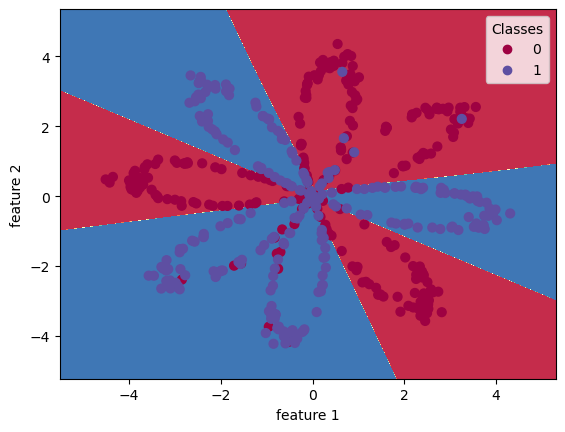

In [5]:
h.plot_1hidden_layer_nn_decision_boundary(forward.weights[0].numpy().T, forward.weights[1].numpy().reshape(-1,1), forward.weights[2].numpy().T, forward.weights[3].numpy().reshape(-1,1), X_np, Y_np)